# Machine Learning complete classification example: pulsar star detection

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,
which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import warnings
from pandas_profiling import ProfileReport

%matplotlib inline

df = pd.read_csv('E:\\Datasets\\pulsar_stars.csv')

In [2]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## EDA

In [3]:
df.shape

(17898, 9)

In [4]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


### Missing values & duplicate rows

In [7]:
print (df.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [8]:
print('Total number of rows: ' + str(df.shape[0]))
print('Number of duplicate rows: ' + str(df[df.duplicated()].shape[0]))

Total number of rows: 17898
Number of duplicate rows: 0


### Data analysis

#### Data distribution

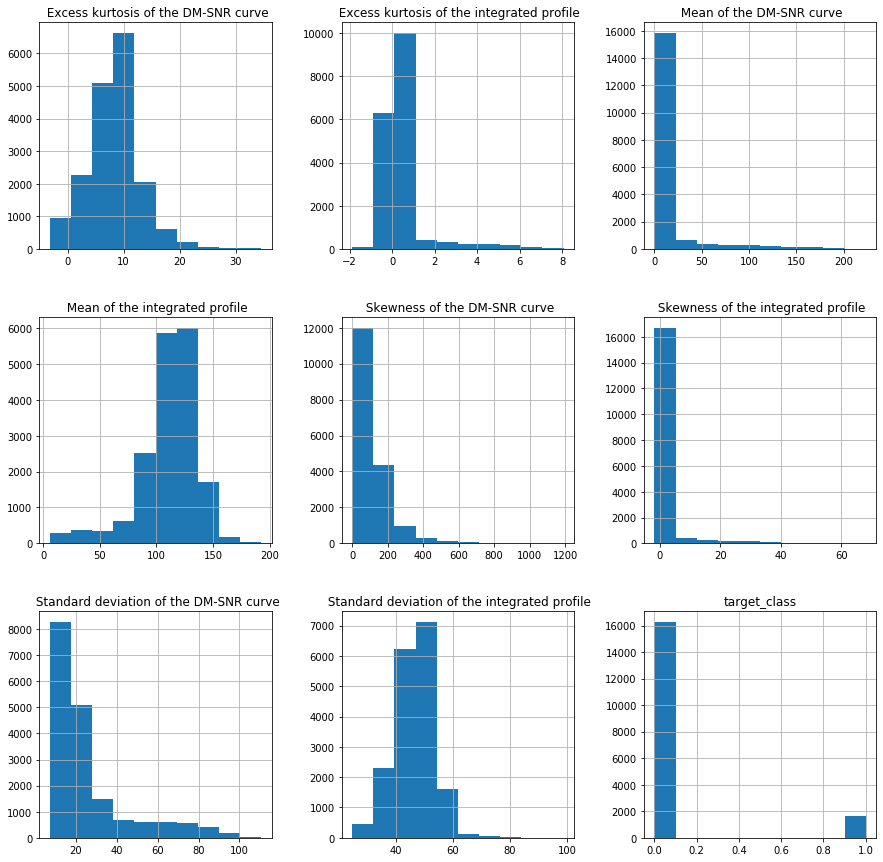

In [9]:
data_distribution = df.hist(figsize=(15,15))

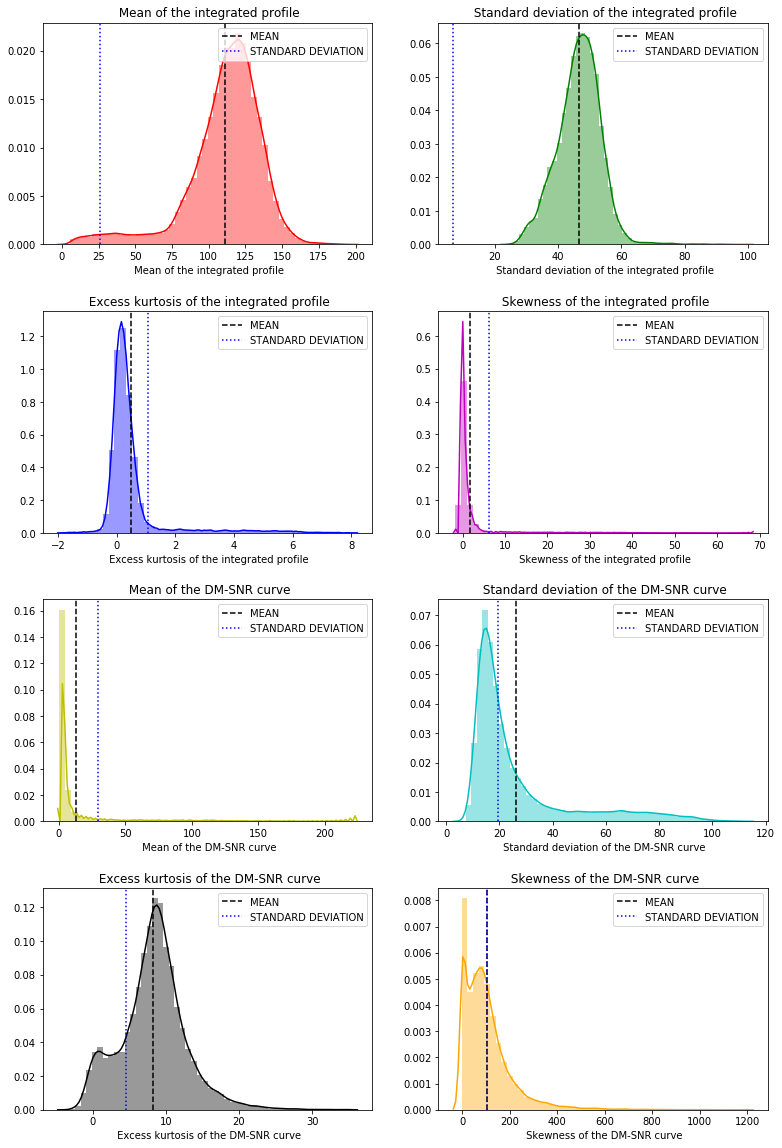

In [10]:
import itertools

columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']

length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    #Distribution plot
    sns.distplot(df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #AXVline
    plt.axvline(df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

#### Correlation matrix

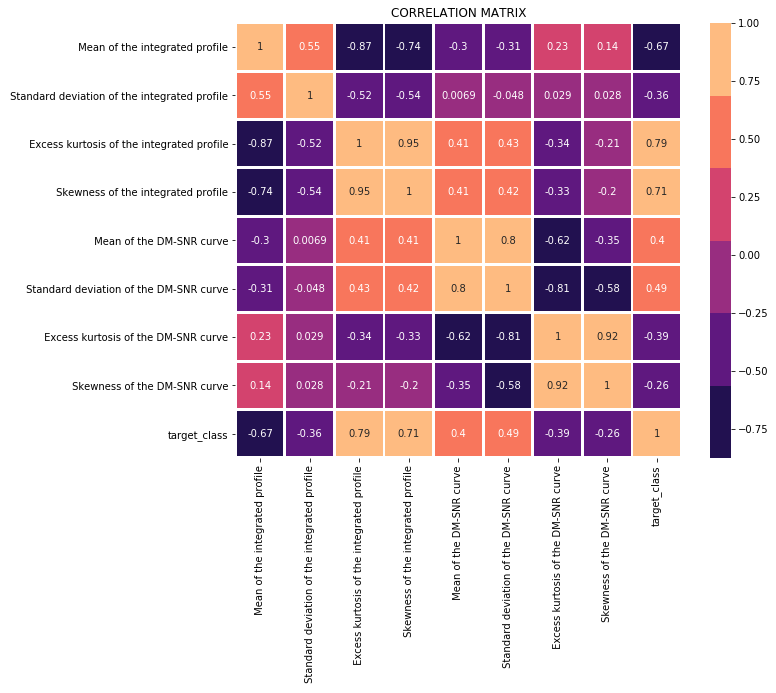

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("magma"),linewidth=2,edgecolor="k")

plt.title("CORRELATION MATRIX")
plt.show()

#### Pairplot: correlation between variables

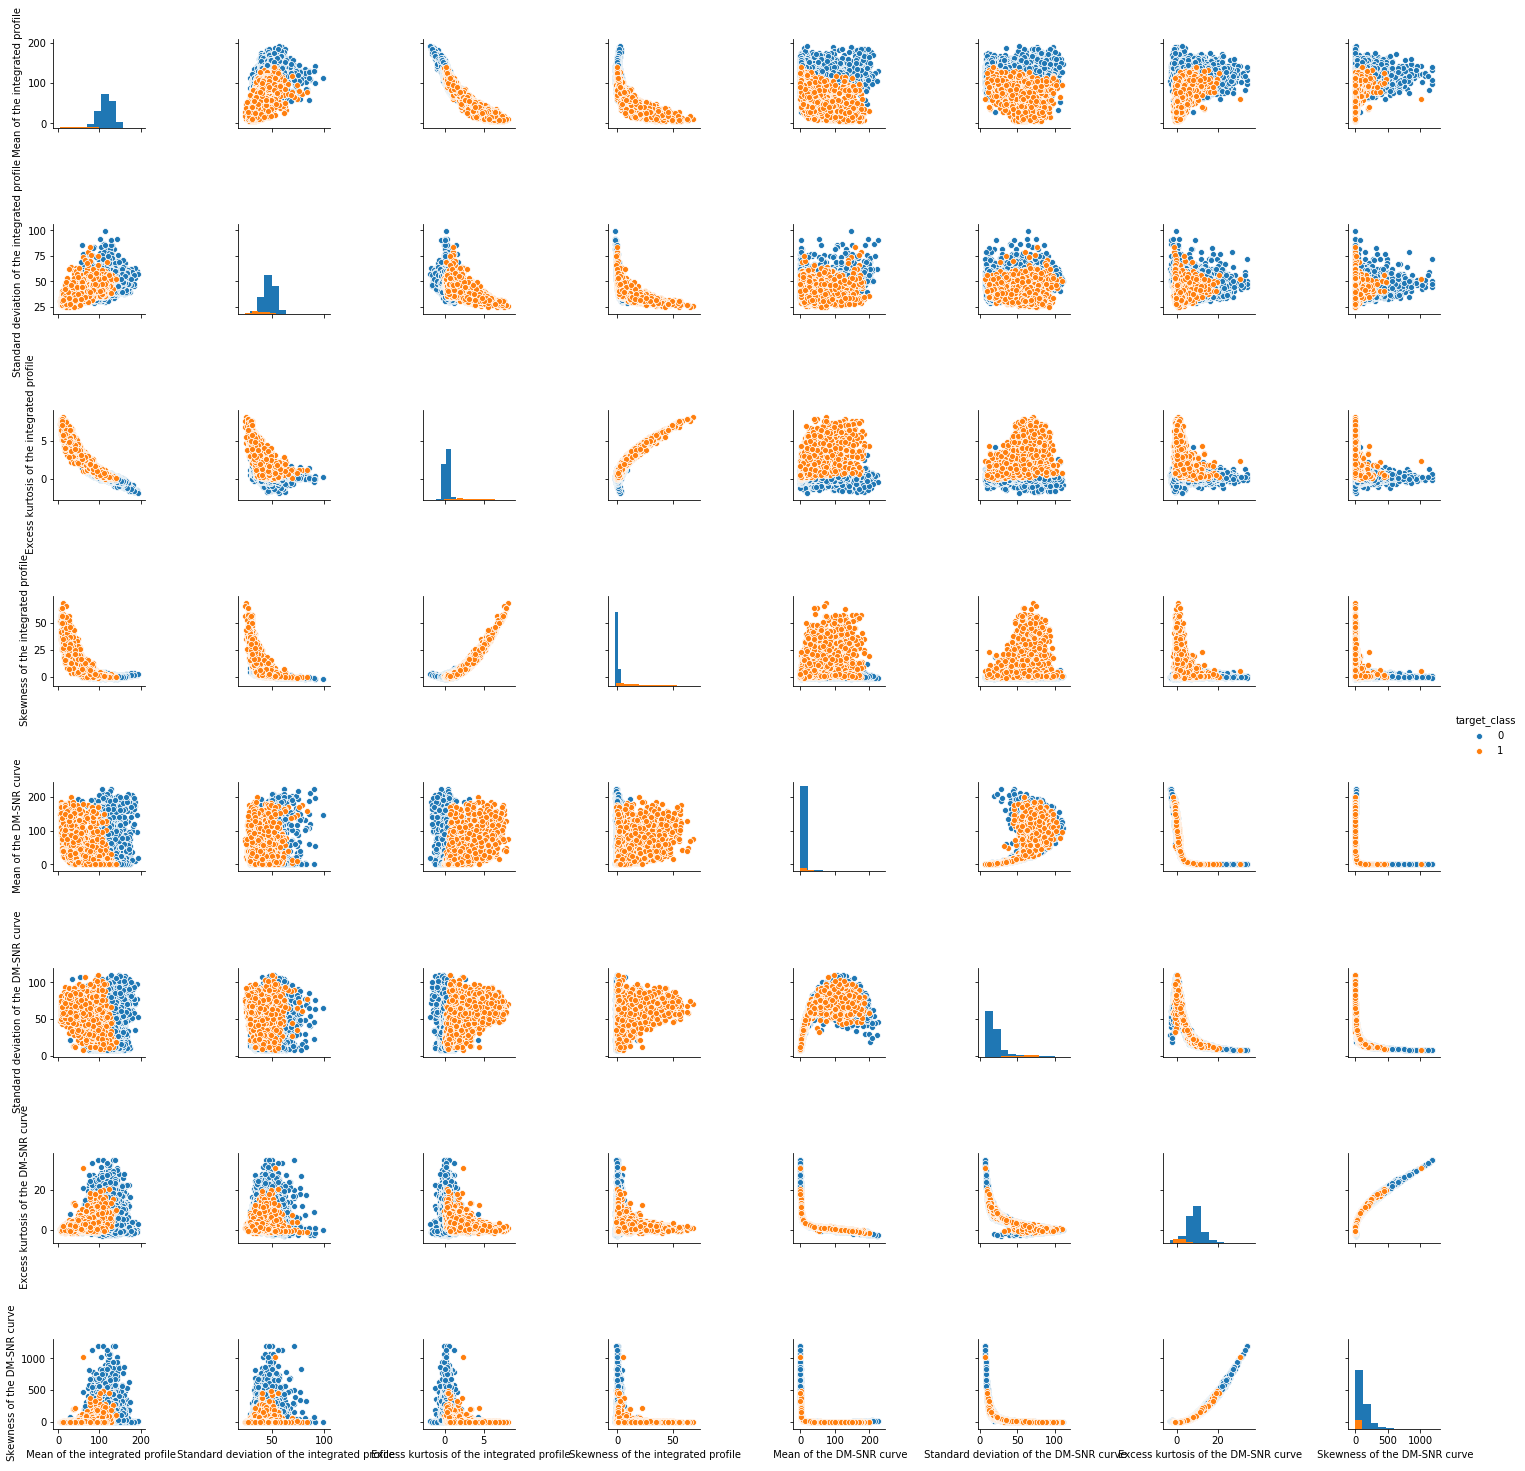

In [12]:
figsize=(20,20)
sns.pairplot(df,hue='target_class', diag_kind = 'hist')

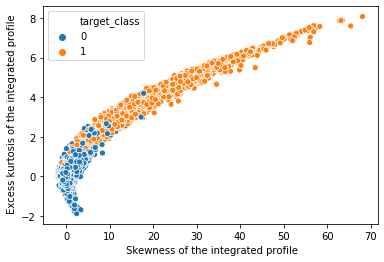

In [13]:
sns.scatterplot(x=' Skewness of the integrated profile', y=' Excess kurtosis of the integrated profile', hue = 'target_class', data = df )

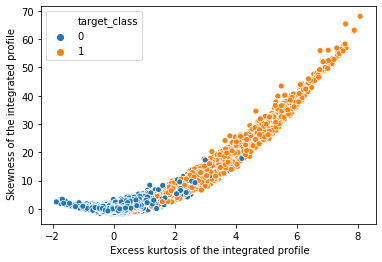

In [14]:
sns.scatterplot(x=' Excess kurtosis of the integrated profile', y=' Skewness of the integrated profile', hue = 'target_class', data = df )

#### Bar plot: Comparing mean and standard deviation of attributes for target classes

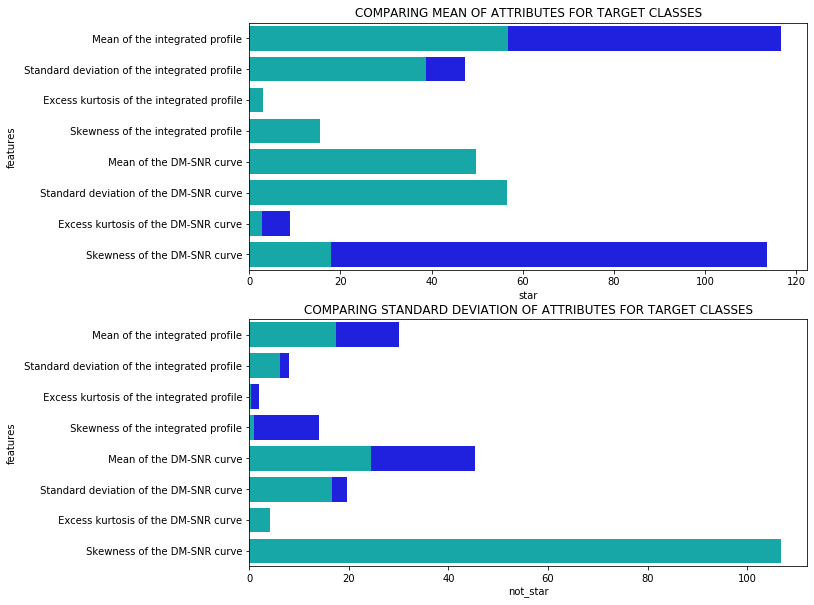

In [15]:
#Mean
compare = df.groupby("target_class")[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']].mean().reset_index()

compare = compare.drop("target_class",axis =1)
compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"not_star", 1:"star"})

#Stardard deviation
compare1 = df.groupby("target_class")[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']].std().reset_index()

compare1 = compare1.drop("target_class",axis=1)
compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"not_star", 1:"star"})

#Plots
sns.set_palette("Set1")
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.barplot(y="features",x="not_star",
            data=compare_mean,color="b")
sns.barplot(y="features",x="star",
            data=compare_mean,color="c")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

plt.subplot(212)
sns.barplot(y="features",x="star",
            data=compare_std,color="b")
sns.barplot(y="features",x="not_star",
            data=compare_std,color="c")
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(wspace =.5)

#### Boxplot

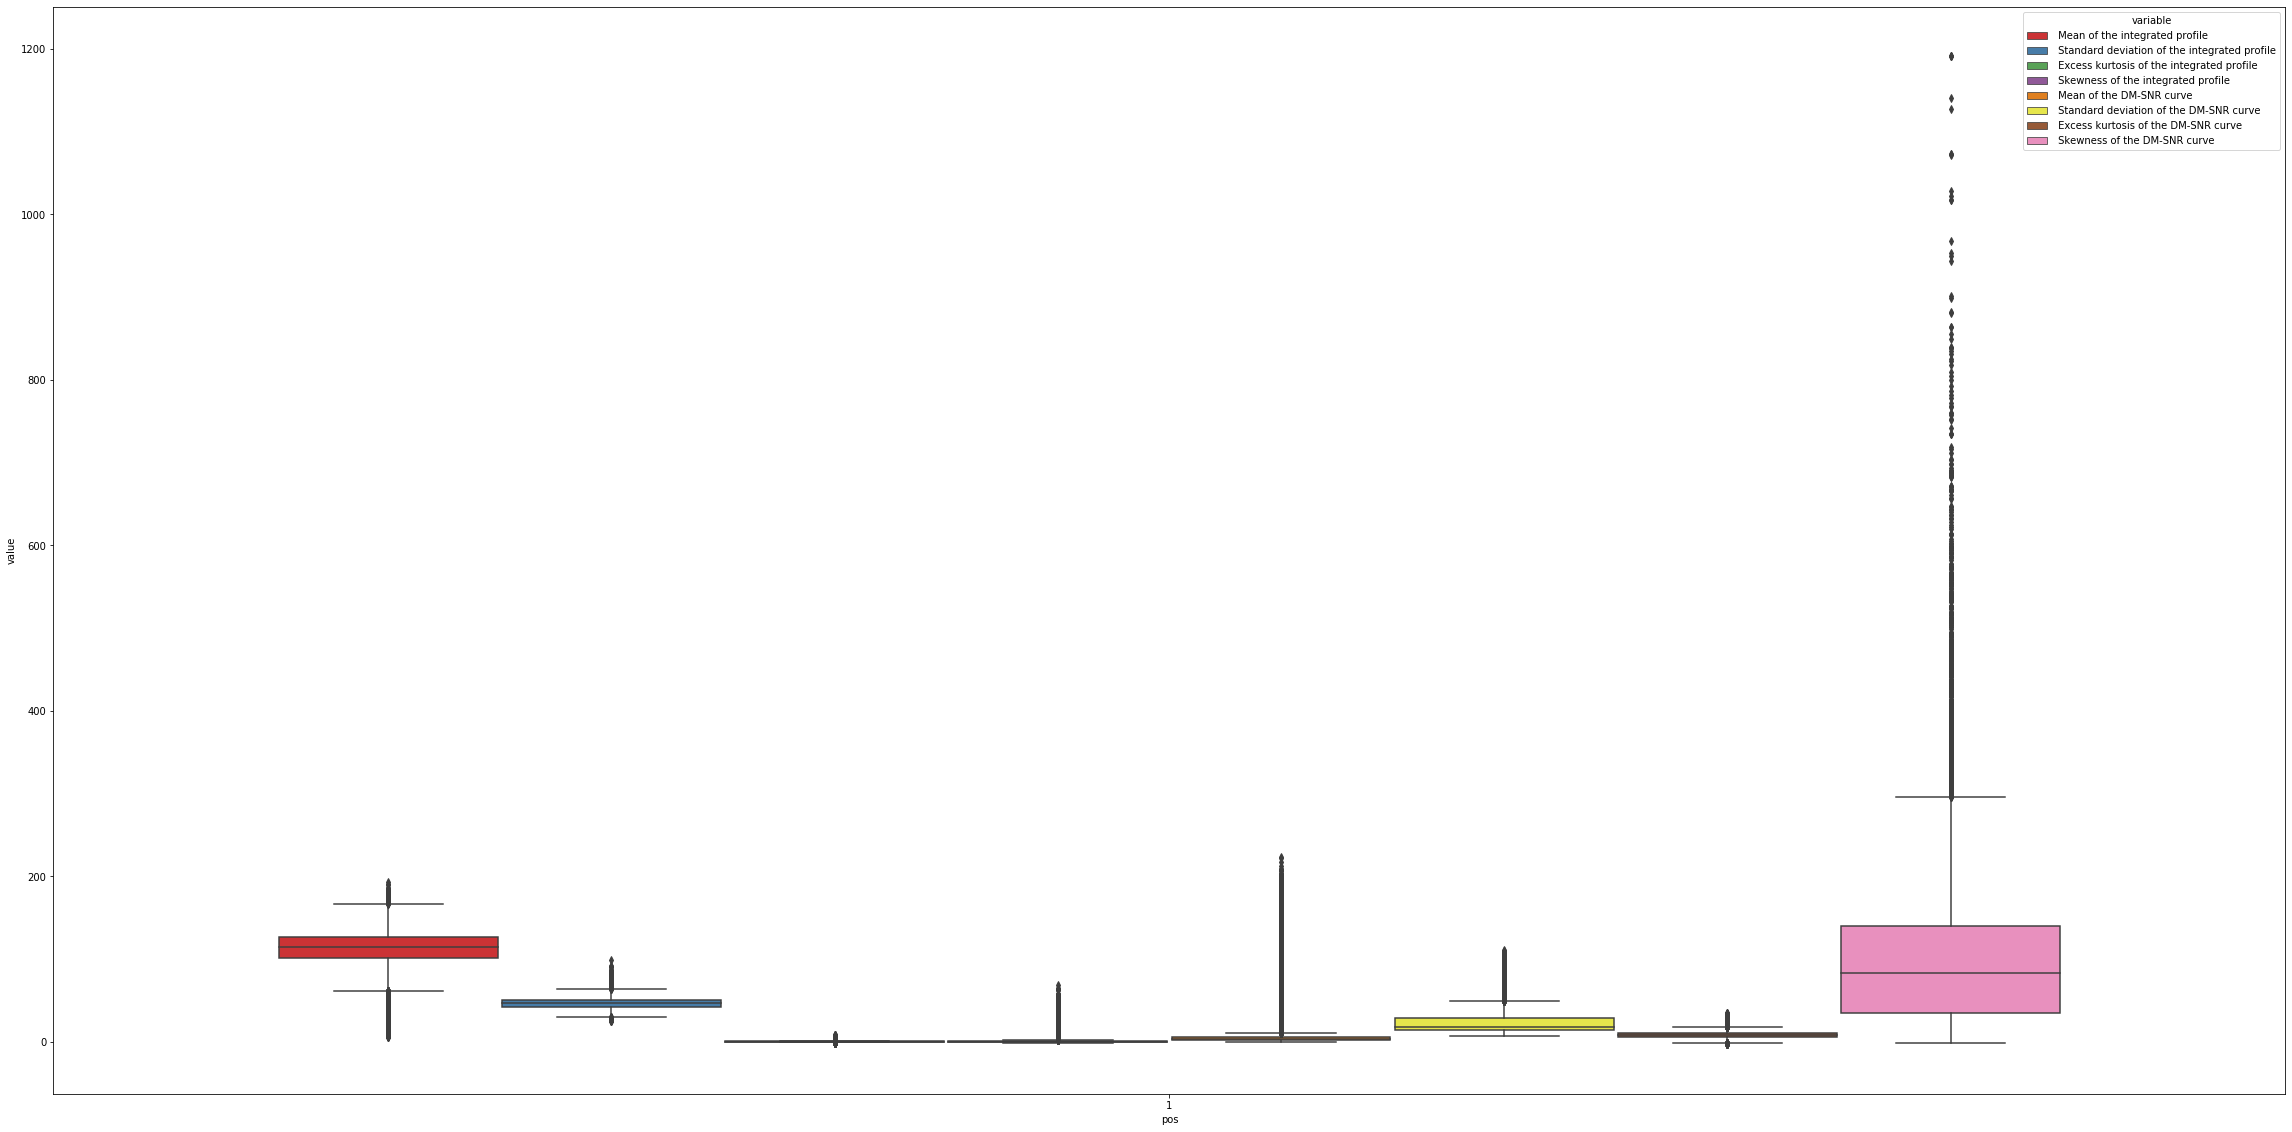

In [16]:
plt.figure(figsize=(40,20))
df_long = pd.melt(df, id_vars='target_class')
sns.boxplot(x='pos', y='value', hue='variable', data=df_long.assign(pos=1))
#by classs: sns.boxplot(x='target_class', y='value', hue='variable', data=df_long)

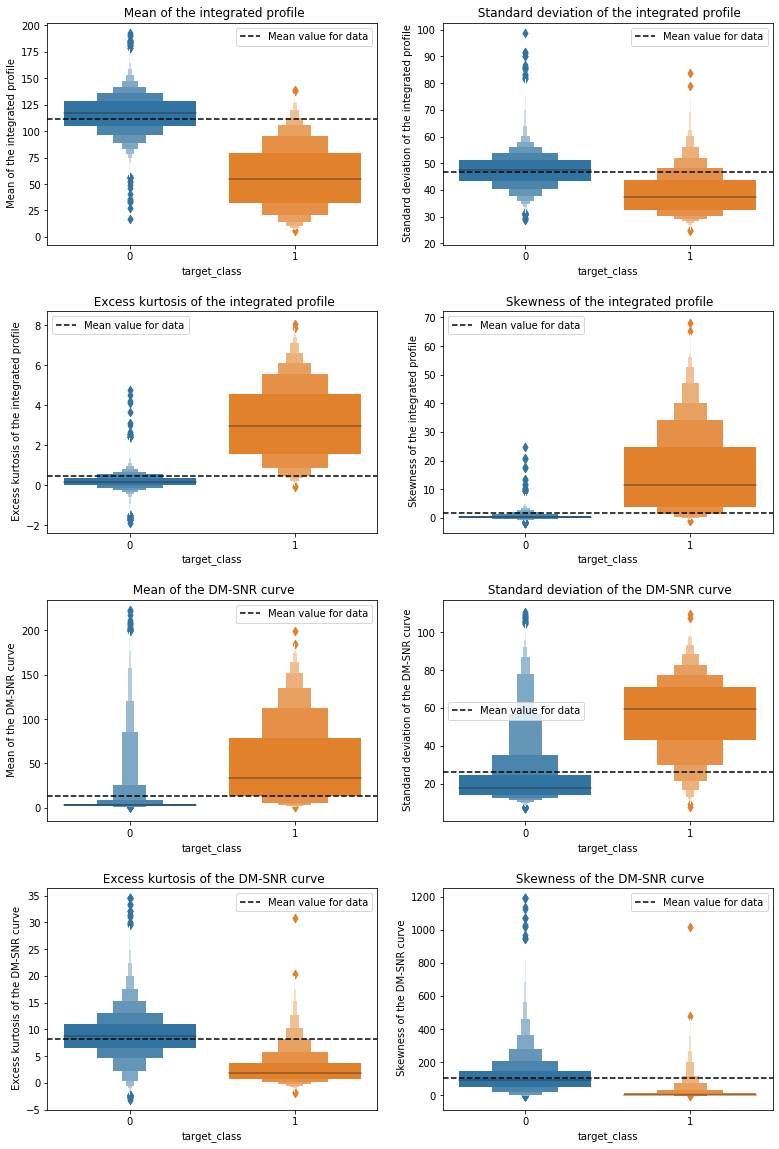

In [3]:
warnings.filterwarnings("ignore")

columns = [x for x in df.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in zip(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=df["target_class"],y=df[i])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(df[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

#### Violin plot

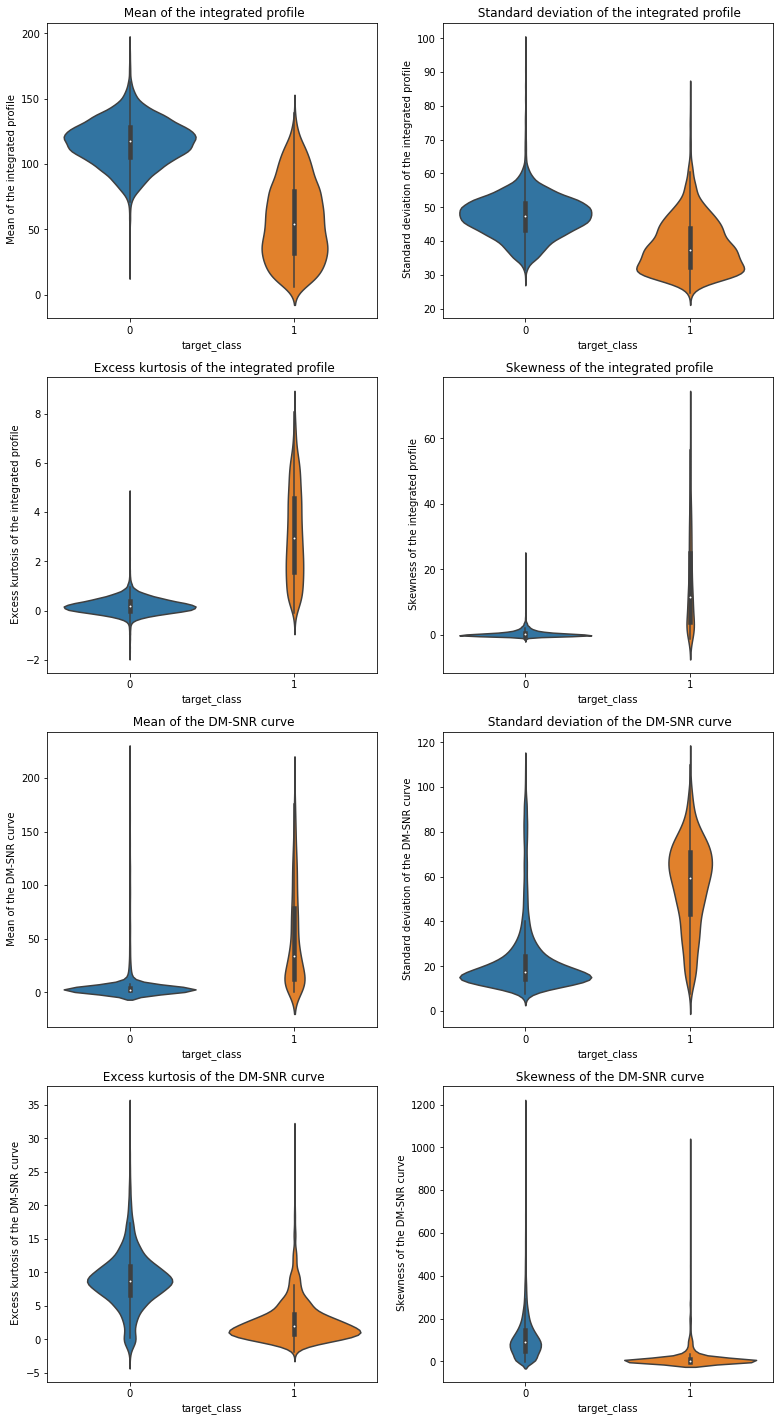

In [10]:
plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=df["target_class"],y=df[i],alpha=.5)
    plt.title(i)

### Class balance

0    16259
1     1639
Name: target_class, dtype: int64


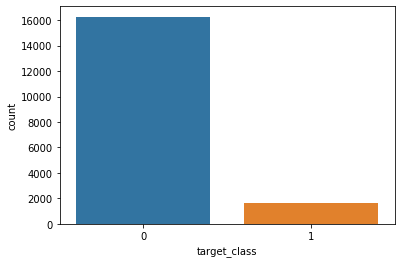

In [11]:
sns.countplot(x= 'target_class', data = df)

print(df['target_class'].value_counts())

#### Resampling dataset

Random under-sampling:
1    1639
0    1639
Name: target_class, dtype: int64


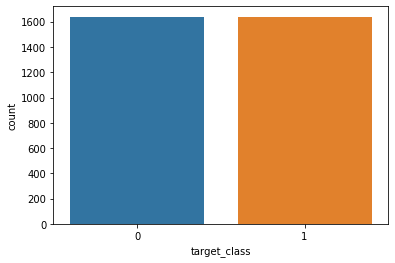

In [14]:
#Under-sample Mayority Class

from sklearn.utils import resample

# Class count
count_class_0, count_class_1 = df.target_class.value_counts()

# Separate majority and minority classes
df_class_0 = df[df.target_class==0]
df_class_1 = df[df.target_class==1]
 
# Under sample mayority class
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.target_class.value_counts())

sns.countplot(x= 'target_class', data = df_under)

## Machine Learning classification

### Data prep

#### Normalization

* For machine learning, every dataset does not require normalization. It is required only when features have different ranges.
* Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve).

In [15]:
from sklearn import preprocessing

df_final = df_under.copy()

X = preprocessing.normalize(df_final.drop(['target_class'], axis=1))
y = df_final['target_class'].values

In [16]:
X[0]

array([0.55764685, 0.2156651 , 0.0015526 , 0.00258344, 0.00679557,
       0.07597335, 0.06029465, 0.7956481 ])

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

#### Train-Test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.15, random_state=101)

In [19]:
print(f'Shape train: {X_train.shape}')
print(f'Shape valid: {X_val.shape}')
print(f'Shape test: {X_test.shape}')

Shape train: (2228, 8)
Shape valid: (394, 8)
Shape test: (656, 8)


### Models

#### Machine Learning Models

* **Logistic Regression**: uses a cost function defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.


* **KNeighborsClassifier**: Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.  KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user.


* **Decision Tree**:  tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.


* **RandomForestClassifier**:A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.


* **Ada Boost Classifier**: An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.


* **ExtraTreesClassifier**: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


* **XGBClassifier**: The XGBoost stands for Extreme Gradient Boosting and it is a boosting algorithm based on Gradient Boosting Machines.  XGboost applies regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting. Another advantage of XGBoost over classical gradient boosting is that it is fast in execution speed.


* **GradientBoostingClassifier**: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


* **RidgeClassifier**: This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).


* **BaggingRidgeClassifier**: A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

#### Evaluation

* **Confusion Matrix**: is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).


* **AUC - ROC curve**: is a performance measurement for a binary classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

X_columns = df.drop(['target_class'], axis=1).columns

classifiers_accuracy = []

classifiers = []

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    classifiers.append(str(algorithm))
    
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    classifiers_accuracy.append(accuracy_score(dtest_y,predictions))
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
    
    #Confusion matrix
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    #ROC - CURVE & AREA UNDER CURVE
    
    if of_type != 'rc':

        predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
        fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
        plt.subplot(222)
        plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
        plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
        plt.legend(loc = "best")
        plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    #feature importance
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,X_columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),X_columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

#### Logistic regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score : 0.913109756097561

classification report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       331
           1       0.94      0.89      0.91       325

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



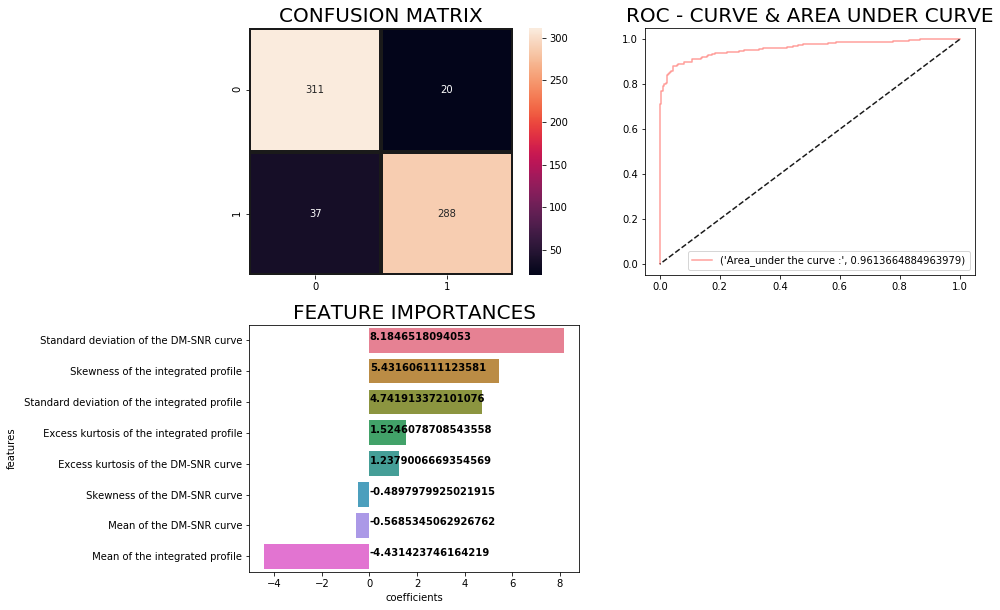

In [30]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
model(log,X_train,y_train,X_test,y_test,'coef')

#### KNeighborsClassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

accuracy_score : 0.9146341463414634

classification report :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       331
           1       0.93      0.89      0.91       325

    accuracy                           0.91       656
   macro avg       0.92      0.91      0.91       656
weighted avg       0.92      0.91      0.91       656



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

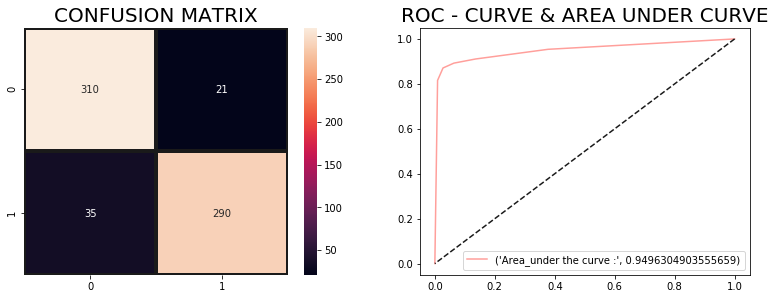

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model(knn,X_train,y_train,X_test,y_test,"none")

#### Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

accuracy_score : 0.9146341463414634

classification report :
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       331
           1       0.92      0.91      0.91       325

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



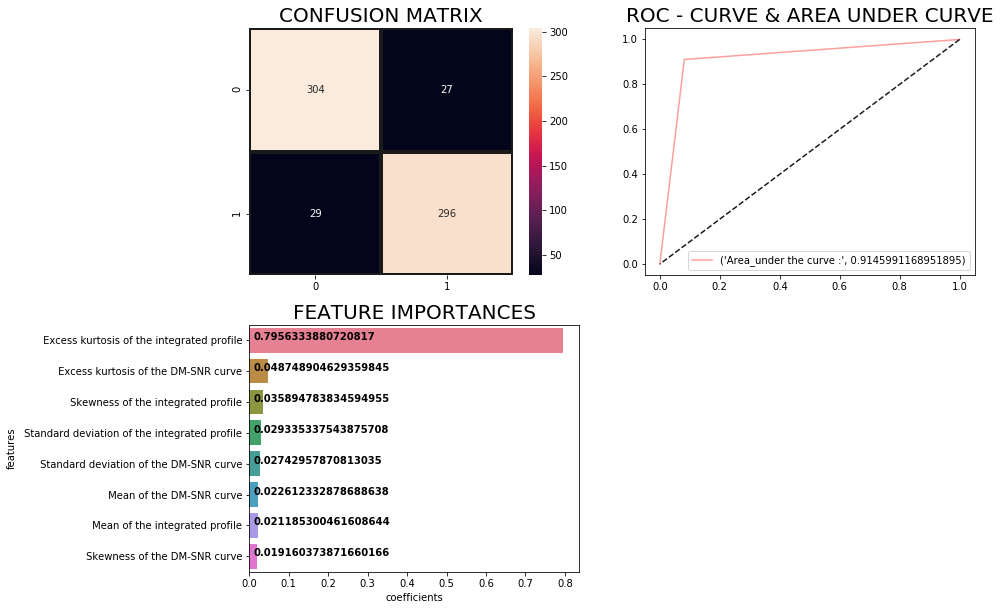

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model(dt,X_train,y_train,X_test,y_test,'feat')

#### Random Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy_score : 0.9329268292682927

classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       331
           1       0.95      0.91      0.93       325

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



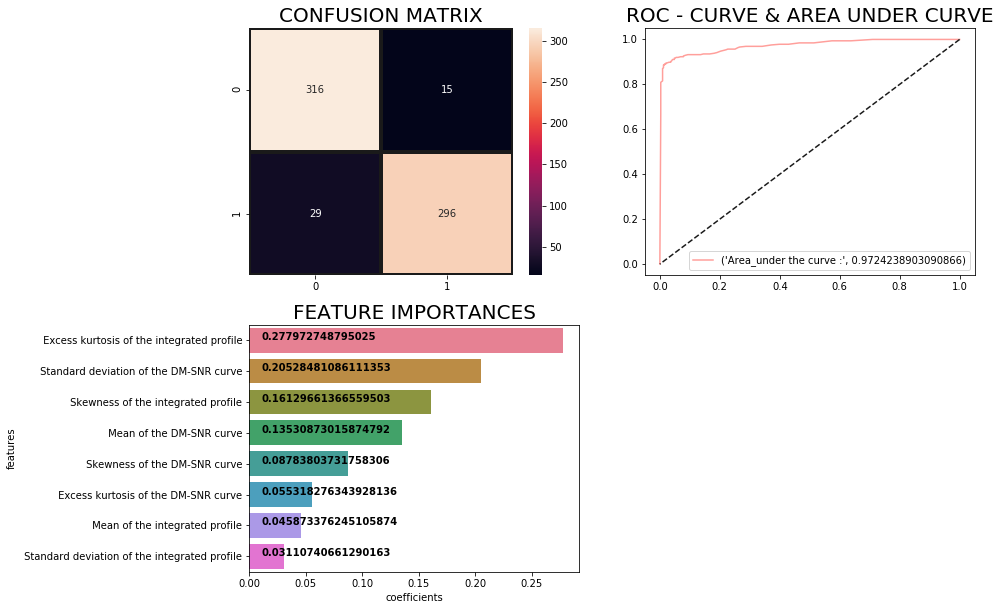

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier()
model(rf,X_train,y_train,X_test,y_test,'feat')

#### AdaBoost Classifier

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

accuracy_score : 0.9314024390243902

classification report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       331
           1       0.96      0.90      0.93       325

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



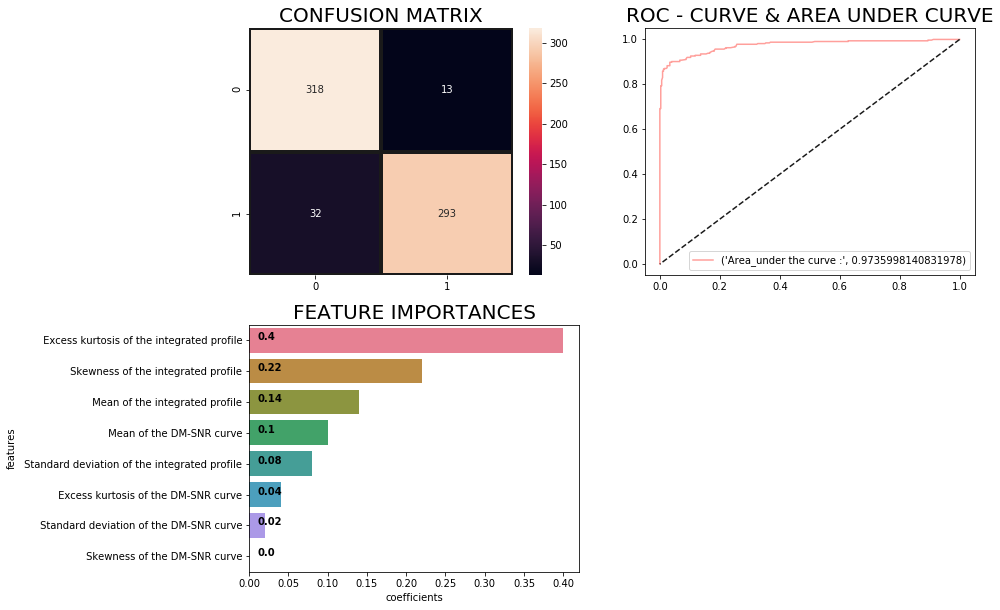

In [34]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
model(abc,X_train,y_train,X_test,y_test,'feat')

#### XGBoost Classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

accuracy_score : 0.9359756097560976

classification report :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       331
           1       0.96      0.91      0.93       325

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656



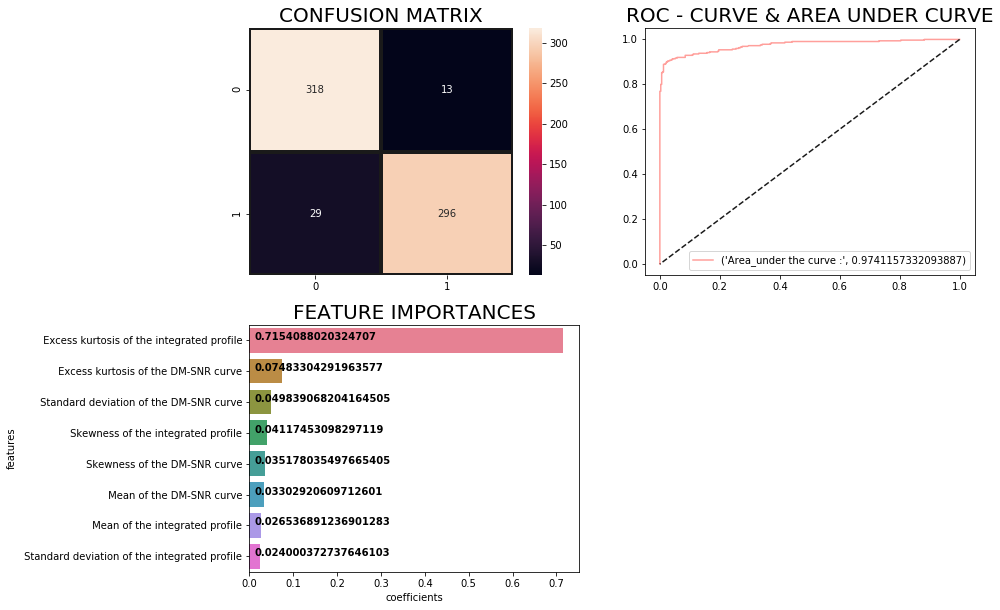

In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model(xgb,X_train,y_train,X_test,y_test,'feat')

#### Extra Tree Classifier

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

accuracy_score : 0.926829268292683

classification report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       331
           1       0.95      0.90      0.92       325

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



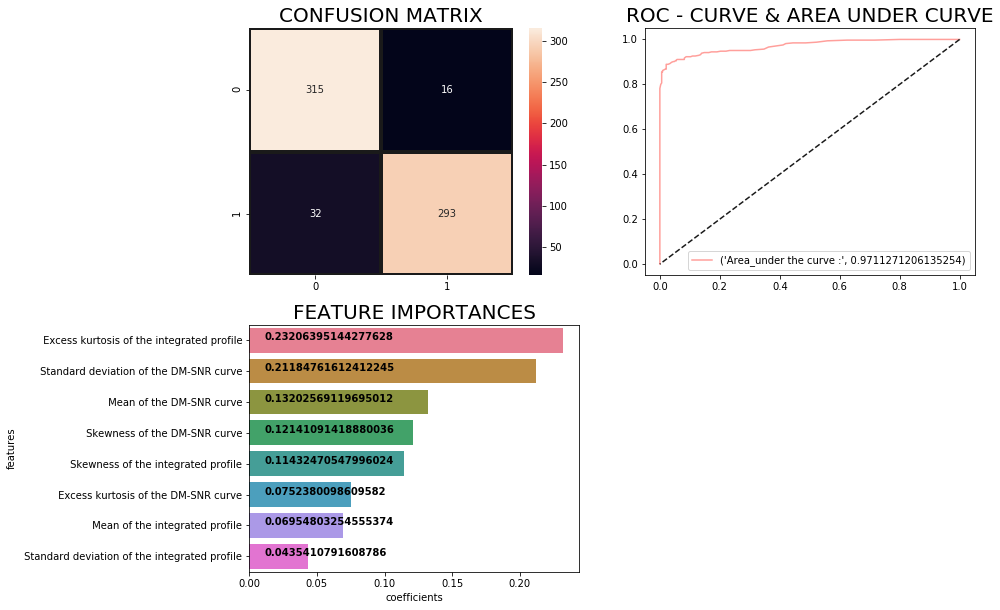

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model(etc,X_train,y_train,X_test,y_test,'feat')

#### GradientBoostingClassifier

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

accuracy_score : 0.9359756097560976

classification report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       331
           1       0.96      0.90      0.93       325

    accuracy                           0.94       656
   macro avg       0.9

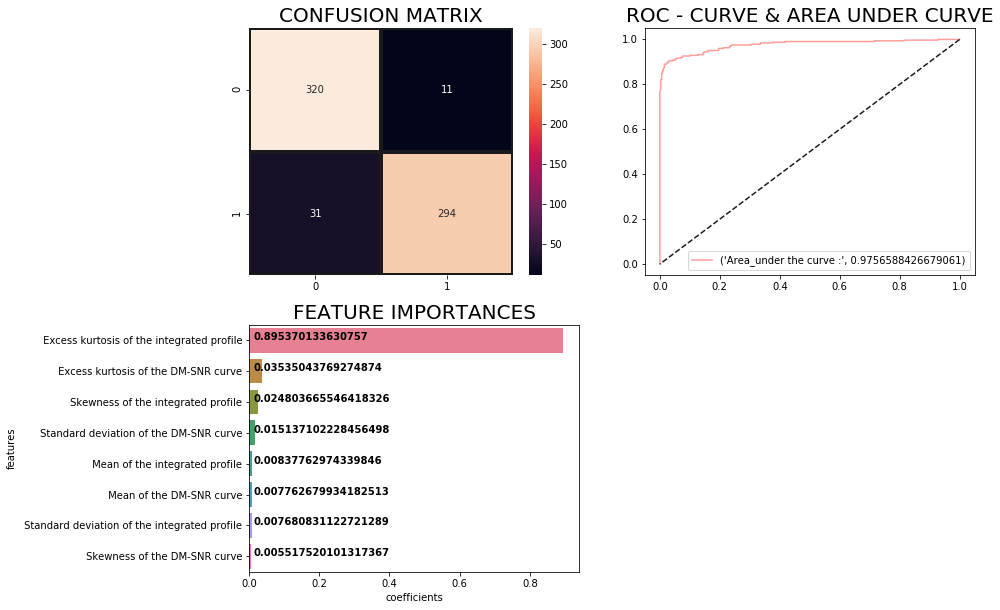

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
model(gbc,X_train,y_train,X_test,y_test,'feat')

#### Ridge Classifier

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

accuracy_score : 0.9100609756097561

classification report :
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       331
           1       0.95      0.86      0.90       325

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



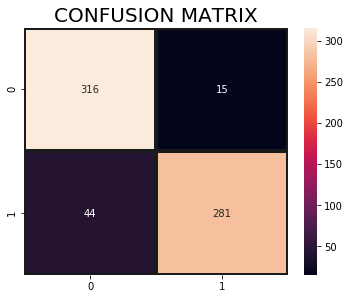

In [38]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
model(rc,X_train,y_train,X_test,y_test,'rc')

#### Bagging Ridge Classifier

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

accuracy_score : 0.9253048780487805

classification report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       331
           1       0.95      0.90      0.92       325

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

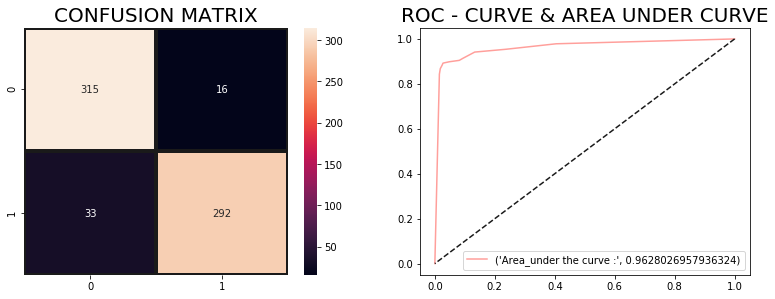

In [39]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
model(bc,X_train,y_train,X_test,y_test,'none')

In [40]:
df_comp = pd.DataFrame()

df_comp['Classifier'] = classifiers 
df_comp['Accuracy'] = classifiers_accuracy

df_comp.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.935976
7,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.935976
3,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.932927
4,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.931402
6,"ExtraTreesClassifier(bootstrap=False, ccp_alph...",0.926829
9,"BaggingClassifier(base_estimator=None, bootstr...",0.925305
1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.914634
2,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.914634
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.913110
8,"RidgeClassifier(alpha=1.0, class_weight=None, ...",0.910061


### Using a Pipeline

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold, cross_validate

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

LogReg: 0.973887 (+/- 0.008203)
KNN: 0.955066 (+/- 0.011586)
DecisionTreeClassifier: 0.900790 (+/- 0.014536)
RandomForestClassifier: 0.970571 (+/- 0.010223)
AdaBoostClassifier: 0.970571 (+/- 0.010223)
XGBClassifier: 0.973870 (+/- 0.007591)
ExtraTreesClassifier: 0.971022 (+/- 0.008440)
GradientBoostingClassifier: 0.972932 (+/- 0.008100)
RidgeClassifier: 0.970636 (+/- 0.009826)
BaggingRidgeClassifier: 0.960212 (+/- 0.010517)


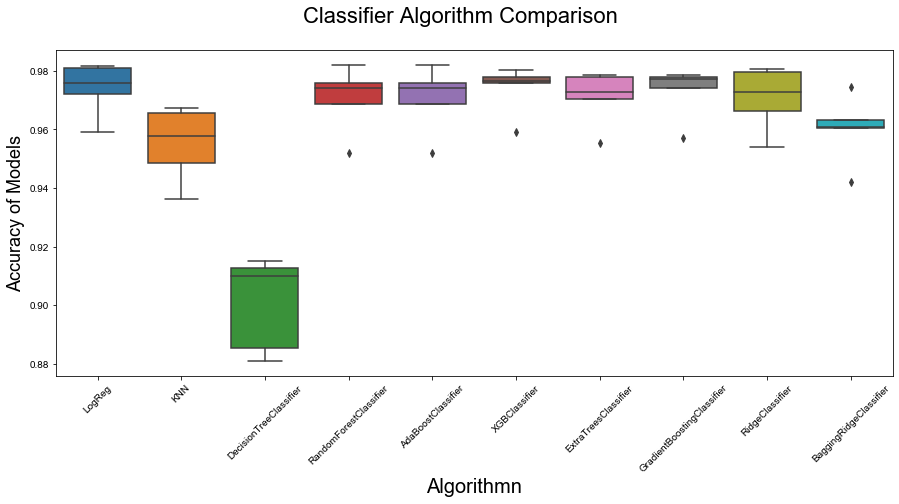

In [42]:
clfs = []
seed = 101

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()), # Standardize features by removing the mean and scaling to unit variance
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=101))]))) 
            #Pipeline(steps(list))
                        #n_jobs: Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”
                        #        -1 means using all processors
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                      ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=101))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=101))]))) 
clfs.append(("AdaBoostClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=101))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_estimators=200, n_jobs=-1, random_state=101))]))) 

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=101))])))


clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=101))]))) 
clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=101))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=101))])))


#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'roc_auc'
n_folds = 5

results, names  = [], [] 

#Kfold-validation
for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.set_style("dark")
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


#### XGBoost algorithm


accuracy_score : 0.9557926829268293

classification report :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       331
           1       0.98      0.93      0.95       325

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



Text(0.5, 1.0, 'Feature importance in XGBoost')

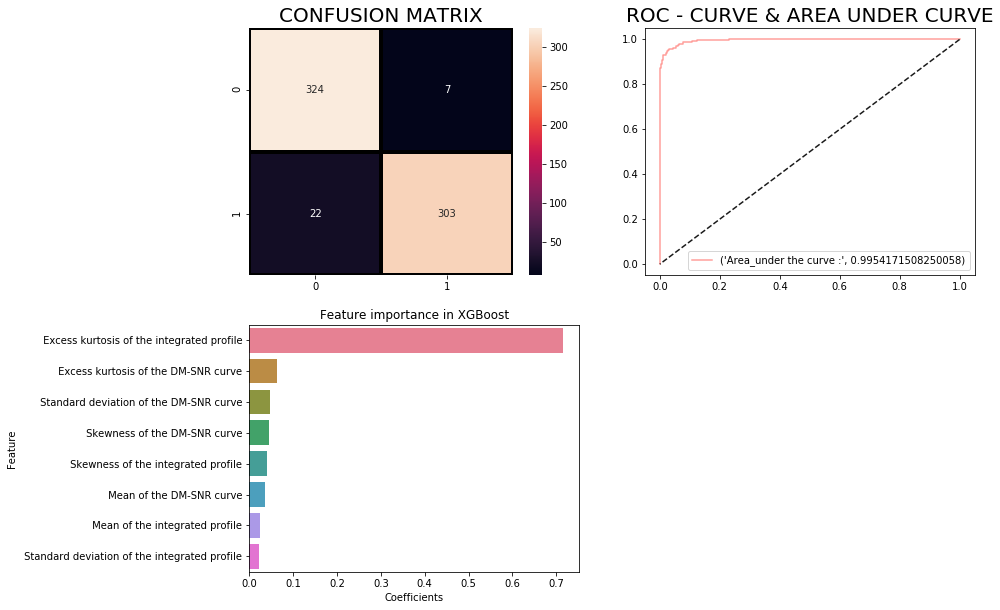

In [22]:
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=200, random_state=101) 

xgb_clf.fit(X, y) 
y_pred = xgb_clf.predict(X_test)
#score = roc_auc_score(y_val, y_pred)

print ("\naccuracy_score :",accuracy_score(y_test,y_pred))

print ("\nclassification report :\n",(classification_report(y_test,y_pred)))
    
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC - CURVE & AREA UNDER CURVE
predicting_probabilites = xgb_clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

#Feature importance

plt.subplot(223)
sf = pd.Series(xgb_clf.feature_importances_,df.drop(['target_class'], axis=1).columns).sort_values(ascending=False)
fi = pd.DataFrame({'Feature':sf.index, 'Coefficients':sf.values})

sns.set_color_codes("pastel")
sns.barplot(x="Coefficients", y="Feature", data=fi, palette="husl").set_title("Feature importance in XGBoost")

#### Tuning hyper-parameters with GridSearch

In [23]:
%%time

from sklearn.model_selection import GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


grid_solver = GridSearchCV(estimator = xgb, # model to train
                   param_grid = params, # param_grid
                   scoring = 'roc_auc',
                   cv = 5)
model_result_svm = grid_solver.fit(X,y)

Wall time: 4min 58s


In [24]:
model_result_svm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [25]:
model_result_svm.best_score_

0.9768945071240542

In [26]:
model_result_svm.best_params_

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 0.8}